## Import tools

In [1]:
import pandas as pd
import requests
import re
import os
import os.path as path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 

## Fetching file

In [2]:
path = "C:/Users/Chris/Desktop/DTU/4. Semester/02466 - Project Work/RedditDataWithLinks_Master.csv"
posts_df = pd.read_csv(path)

C:\Users\Chris\AppData\Local\Temp\ipykernel_106060\1946963662.py:2: DtypeWarning: Columns (19,21,22,25,26,27,28,29,30,32,33,35,41,42,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  posts_df = pd.read_csv(path)


##### Preview samples

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 25)
print(posts_df)


        Subreddit SubredditID  \
0       EarthPorn    t5_2sbq3   
1       EarthPorn    t5_2sbq3   
2       EarthPorn    t5_2sbq3   
3       EarthPorn    t5_2sbq3   
4       EarthPorn    t5_2sbq3   
...           ...         ...   
763350  EarthPorn    t5_2sbq3   
763351  EarthPorn    t5_2sbq3   
763352  EarthPorn    t5_2sbq3   
763353  EarthPorn    t5_2sbq3   
763354  EarthPorn    t5_2sbq3   

                                                PostTitle  PostID  \
0                       Kalsoy, Faroe Islands [2214x1548]   swun9   
1       The shimmering slopes of the pristine Austrian...   swtuj   
2       Moon and Clouds in Eleuthera, Bahamas [OC] [90...   swteg   
3            Brennisteinsalda volcano, Iceland [1024x768]   swr1z   
4               View from Val Thorens, France [5604x2082]   swqhw   
...                                                   ...     ...   
763350  What it's like to sit at the edge of Half Dome...  6v2l1x   
763351                 Shot on Galaxy S7. Tučepi, C

## Clean up data

##### Get list of all column names

In [4]:
colunmNames = posts_df.columns.to_list()
print(colunmNames)

['Subreddit', 'SubredditID', 'PostTitle', 'PostID', 'TimeString', 'PostTime', 'Username', 'ViewCount', 'Upvotes', 'Ups', 'Downs', 'UpvoteRatio', 'CommentNumber', 'Edited', 'ImageDomain', 'ImageURL', 'Permalink', 'IsTextPost', 'PostText', 'SelfTextHTML', 'UserCreatedTime', 'AuthorName', 'Distinguished', 'LinkFlairClass', 'LinkFlairText', 'AuthorBirthdate', 'IsVideo', 'IsMeta', 'IsOriginal', 'IsRedditMediaDomain', 'IsCrosspostable', 'CrosspostsNumber', 'CrosspostParent', 'CrosspostParentList', 'SubRedditSubscribers', 'OnlyMedia', 'EmbeddedMedia', 'SecureEmbeddedMedia', 'Media', 'SecureMedia', 'Thumbnail', 'Stickied', 'Archived', 'IsHideScore', 'Pinned', 'PostHint', 'Preview', 'CommentsLocked', 'NSFW', 'NewURL']


##### Remove unwanted columns

In [5]:
posts_df.drop(columns = ['quarantine', 'link_flair_template_id', 'edited_on', 'call_to_action', 'subreddit_name_prefixed', 'discussion_type', 'post_categories', 'content_categories', 'category', 'can_gild', 'author_flair_template_id', 'from', 'from_kind', 'from_id', 'hidden', 'likes', 'retrieved_utc', 'created', 'report_reasons', 'approved_by', 'saved', 'removal_reason', 'num_reports', 'author_flair_css_class', 'author_flair_text', 'gilded', 'mod_reports', 'user_reports', 'brand_safe', 'contest_mode', 'spoiler', 'suggested_sort', 'author_flair_richtext', 'author_flair_type', 'link_flair_richtext', 'link_flair_text_color', 'link_flair_type', 'rte_mode', 'subreddit_type', 'thumbnail_height', 'thumbnail_width', 'author_flair_background_color', 'author_flair_text_color', 'author_patreon_flair', 'gildings', 'is_robot_indexable', 'link_flair_background_color', 'send_replies', 'no_follow', 'updated_utc', 'all_awardings', 'allow_live_comments', 'author_premium', 'awarders', 'total_awards_received', 'treatment_tags', 'is_created_from_ads_ui', 'parent_whitelist_status', 'pwls', 'url_overridden_by_dest', 'whitelist_status', 'wls', 'removed_by_category', 'approved_at_utc', 'banned_at_utc', 'removed_by', 'top_awarded_type', 'retrieved_on'], inplace = True, errors='ignore')

colunmNames = posts_df.columns.to_list()
print(colunmNames)
print(len(colunmNames))
del colunmNames

['Subreddit', 'SubredditID', 'PostTitle', 'PostID', 'TimeString', 'PostTime', 'Username', 'ViewCount', 'Upvotes', 'Ups', 'Downs', 'UpvoteRatio', 'CommentNumber', 'Edited', 'ImageDomain', 'ImageURL', 'Permalink', 'IsTextPost', 'PostText', 'SelfTextHTML', 'UserCreatedTime', 'AuthorName', 'Distinguished', 'LinkFlairClass', 'LinkFlairText', 'AuthorBirthdate', 'IsVideo', 'IsMeta', 'IsOriginal', 'IsRedditMediaDomain', 'IsCrosspostable', 'CrosspostsNumber', 'CrosspostParent', 'CrosspostParentList', 'SubRedditSubscribers', 'OnlyMedia', 'EmbeddedMedia', 'SecureEmbeddedMedia', 'Media', 'SecureMedia', 'Thumbnail', 'Stickied', 'Archived', 'IsHideScore', 'Pinned', 'PostHint', 'Preview', 'CommentsLocked', 'NSFW', 'NewURL']
50


##### Change column names and reorder columns

1. Create dictionary - 'old name' : 'new name'

In [6]:
column_names = {'id' : 'PostID',
                'subreddit' : 'Subreddit',
                'subreddit_id' : 'SubredditID',
                'created_utc' : 'PostTime',
                'title' : 'PostTitle',
                'author' : 'Username',
                'author_created_utc' : 'UserCreatedTime',
                'author_fullname' : 'AuthorName', 
                'domain' : 'ImageDomain',
                'full_link' : 'Link',
                'is_self' : 'IsTextPost',
                'media_embed' : 'EmbeddedMedia',
                'secure_media_embed' : 'SecureEmbeddedMedia',
                'num_comments' : 'CommentNumber', 
                'over_18' : 'NSFW',
                'permalink' : 'Permalink', 
                'score' : 'Upvotes', 
                'selftext' : 'PostText', 
                'thumbnail' : 'Thumbnail',
                'url' : 'ImageURL',
                'media' : 'Media',
                'secure_media' : 'SecureMedia',
                'stickied' : 'Stickied',
                'locked' : 'CommentsLocked',
                'post_hint' : 'PostHint',
                'preview' : 'Preview',
                'is_crosspostable' : 'IsCrosspostable',
                'is_reddit_media_domain' : 'IsRedditMediaDomain',
                'is_video' : 'IsVideo',
                'num_crossposts' : 'CrosspostsNumber', 
                'pinned' : 'Pinned',
                'crosspost_parent' : 'CrosspostParent',
                'crosspost_parent_list' : 'CrosspostParentList',
                'is_meta' : 'IsMeta',
                'is_original_content' : 'IsOriginal',
                'media_only' : 'OnlyMedia', 
                'subreddit_subscribers' : 'SubRedditSubscribers',
                'media_metadata' : 'MediaMetadata', 
                'upvote_ratio' : 'UpvoteRatio', 
                'gallery_data' : 'GalleryData', 
                'is_gallery' : 'IsGallery', 
                'author_cakeday' : 'AuthorBirthdate',
                'edited' : 'Edited', 
                'view_count' : 'ViewCount', 
                'author_id' : 'AuthorID',
                'og_description' : 'OGDescription',
                'og_title' : 'OGTitle',
                'utc_datetime_str' : 'TimeString',
                'ups' : 'Ups',
                'downs' : 'Downs',
                'selftext_html' : 'SelfTextHTML',
                'distinguished' : 'Distinguished',
                'link_flair_css_class' : 'LinkFlairClass',
                'link_flair_text' : 'LinkFlairText',
                'archived' : 'Archived',
                'hide_score' : 'IsHideScore'}

2. Rename columns using dictionary

In [7]:
posts_tidy_df = posts_df.rename(columns = column_names)
# Check to see if columns have been renamed
posts_tidy_df.columns 

Index(['Subreddit', 'SubredditID', 'PostTitle', 'PostID', 'TimeString',
       'PostTime', 'Username', 'ViewCount', 'Upvotes', 'Ups', 'Downs',
       'UpvoteRatio', 'CommentNumber', 'Edited', 'ImageDomain', 'ImageURL',
       'Permalink', 'IsTextPost', 'PostText', 'SelfTextHTML',
       'UserCreatedTime', 'AuthorName', 'Distinguished', 'LinkFlairClass',
       'LinkFlairText', 'AuthorBirthdate', 'IsVideo', 'IsMeta', 'IsOriginal',
       'IsRedditMediaDomain', 'IsCrosspostable', 'CrosspostsNumber',
       'CrosspostParent', 'CrosspostParentList', 'SubRedditSubscribers',
       'OnlyMedia', 'EmbeddedMedia', 'SecureEmbeddedMedia', 'Media',
       'SecureMedia', 'Thumbnail', 'Stickied', 'Archived', 'IsHideScore',
       'Pinned', 'PostHint', 'Preview', 'CommentsLocked', 'NSFW', 'NewURL'],
      dtype='object')

3. Reorder columns

In [8]:
posts_tidy_df = posts_tidy_df[['Subreddit', 'SubredditID', 'PostTitle', 'PostID', 'TimeString', 'PostTime', 'Username', 'ViewCount', 'Upvotes', 'Ups', 'Downs', 'UpvoteRatio', 'CommentNumber', 'Edited', 'ImageDomain', 'ImageURL', 'Permalink', 'IsTextPost', 'PostText', 'SelfTextHTML', 'UserCreatedTime', 'AuthorName', 'Distinguished', 'LinkFlairClass', 'LinkFlairText', 'AuthorBirthdate', 'IsVideo', 'IsMeta', 'IsOriginal', 'IsRedditMediaDomain', 'IsCrosspostable', 'CrosspostsNumber', 'CrosspostParent', 'CrosspostParentList', 'SubRedditSubscribers', 'OnlyMedia', 'EmbeddedMedia', 'SecureEmbeddedMedia', 'Media', 'SecureMedia', 'Thumbnail', 'Stickied', 'Archived', 'IsHideScore', 'Pinned', 'PostHint', 'Preview', 'CommentsLocked', 'NSFW', 'NewURL']]

In [9]:
print(posts_tidy_df)

        Subreddit SubredditID   
0       EarthPorn    t5_2sbq3  \
1       EarthPorn    t5_2sbq3   
2       EarthPorn    t5_2sbq3   
3       EarthPorn    t5_2sbq3   
4       EarthPorn    t5_2sbq3   
...           ...         ...   
575053  EarthPorn    t5_2sbq3   
575054  EarthPorn    t5_2sbq3   
575055  EarthPorn    t5_2sbq3   
575056  EarthPorn    t5_2sbq3   
575057  EarthPorn    t5_2sbq3   

                                                PostTitle  PostID   
0                       Kalsoy, Faroe Islands [2214x1548]   swun9  \
1       The shimmering slopes of the pristine Austrian...   swtuj   
2               View from Val Thorens, France [5604x2082]   swqhw   
3                   Devetashka Cave, Bulgaria [1600x1071]   swq3t   
4                    Yellowstone National Park [1062x752]   swphj   
...                                                   ...     ...   
575053  What it's like to sit at the edge of Half Dome...  6v2l1x   
575054                 Shot on Galaxy S7. Tučepi, C

#### Fix image URLS

In [10]:
#create column for fixed urls
posts_tidy_df = posts_tidy_df.reindex(columns = posts_tidy_df.columns.tolist() + ['NewURL'])

posts_tidy_df = posts_tidy_df.head(50)

In [11]:
for index, row in posts_tidy_df.iterrows():
    if row['ImageDomain'] == 'flickr.com':
        print(row['ImageURL'])
        r = requests.get(row['ImageURL'])
        soup = bs(r.content)
        images = re.findall(r'(\/\/live\.staticflickr\.com\/[0-9][0-9][0-9][0-9]\/[a-zA-Z0-9_]+\.(?:png|jpg|jpeg|gif|png|svg))', str(soup))
        
        for image in images:
            image_url = image
            break
        print(image_url)
        posts_tidy_df.at[index, 'NewURL'] = image_url
    elif row['ImageDomain'] == 'imgur.com':
        posts_tidy_df.at[index, 'NewURL'] = re.sub(r'http://imgur.com', 'http://i.imgur.com', row['ImageURL']) + '.jpg'
    elif row['ImageDomain'] == 'i.imgur.com':
        posts_tidy_df.at[index, 'NewURL'] = row['ImageURL']
    else:
        continue

# Save the new DataFrame as a CSV file
posts_tidy_df.to_csv("C:/Users/sebas/OneDrive/Dokumenter/skole/4 Semester/Fagprojekt/RedditDataWithLinks.csv", index=False)

http://www.flickr.com/photos/visbeek/6772214933/lightbox/
//live.staticflickr.com/7146/6772214933_a5d596dc4a_b.jpg
http://www.flickr.com/photos/worldofarun/5690199815/sizes/l/in/set-72157622764231740/
//live.staticflickr.com/5229/5690199815_87c9e2ac3f_m.jpg
http://www.flickr.com/photos/gmj49/6971856078/
//live.staticflickr.com/8164/6971856078_1fb002b26d_b.jpg
http://www.flickr.com/photos/parfeniuk/5766183609/in/set-72157626675557795/lightbox/
//live.staticflickr.com/2224/5766183609_969d89454e_b.jpg
http://www.flickr.com/photos/germanvidal/7116403841/lightbox/
//live.staticflickr.com/7043/7116403841_c031502d14_b.jpg
http://www.flickr.com/photos/40122107@N07/7117169465/
//live.staticflickr.com/8157/7117169465_50b4b453af_b.jpg
http://www.flickr.com/photos/paxson_woelber/6950018551/in/photostream/lightbox/
//live.staticflickr.com/7195/6950018551_8115d3cc2b_b.jpg
http://www.flickr.com/photos/gabrielgaviao/5934852996/in/set-72157629484768944/lightbox/
//live.staticflickr.com/6143/5934852996_

## Save data frame and images // START FROM HERE IF YOU HAVE MASTER FILE

#### View data frame

In [5]:
path = "C:/Users/Chris/Desktop/DTU/4. Semester/02466 - Project Work/RedditDataWithLinks_Master.csv"
posts_tidy_df = pd.read_csv(path)

pd.set_option('display.max_columns', None)
posts_tidy_df


C:\Users\Chris\AppData\Local\Temp\ipykernel_106060\922294921.py:2: DtypeWarning: Columns (19,21,22,25,26,27,28,29,30,32,33,35,41,42,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  posts_tidy_df = pd.read_csv(path)


,Subreddit,SubredditID,PostTitle,PostID,TimeString,PostTime,Username,ViewCount,Upvotes,Ups,Downs,UpvoteRatio,CommentNumber,Edited,ImageDomain,ImageURL,Permalink,IsTextPost,PostText,SelfTextHTML,UserCreatedTime,AuthorName,Distinguished,LinkFlairClass,LinkFlairText,AuthorBirthdate,IsVideo,IsMeta,IsOriginal,IsRedditMediaDomain,IsCrosspostable,CrosspostsNumber,CrosspostParent,CrosspostParentList,SubRedditSubscribers,OnlyMedia,EmbeddedMedia,SecureEmbeddedMedia,Media,SecureMedia,Thumbnail,Stickied,Archived,IsHideScore,Pinned,PostHint,Preview,CommentsLocked,NSFW,NewURL
0,EarthPorn,t5_2sbq3,"Kalsoy, Faroe Islands [2214x1548]",swun9,2012-04-28 15:32:12,1335627132,jonpacker,NaN,115,124.0,9.0,NaN,2,False,i.imgur.com,http://i.imgur.com/x0PIq.jpg,/r/EarthPorn/comments/swun9/kalsoy_faroe_islan...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,http://e.thumbs.redditmedia.com/oCCuPAV58aNOHE...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,http://i.imgur.com/x0PIq.jpg
1,EarthPorn,t5_2sbq3,The shimmering slopes of the pristine Austrian...,swtuj,2012-04-28 15:08:04,1335625684,kjoneslol,NaN,9,13.0,4.0,NaN,0,False,flickr.com,http://www.flickr.com/photos/visbeek/677221493...,/r/EarthPorn/comments/swtuj/the_shimmering_slo...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,http://e.thumbs.redditmedia.com/pRiuG_KieSX9rF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,//live.staticflickr.com/7146/6772214933_a5d596...
2,EarthPorn,t5_2sbq3,"Moon and Clouds in Eleuthera, Bahamas [OC] [90...",swteg,2012-04-28 14:54:45,1335624885,[deleted],NaN,3,3.0,0.0,NaN,1,False,flickr.com,http://www.flickr.com/photos/devon_buckingham/...,/r/EarthPorn/comments/swteg/moon_and_clouds_in...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,//live.staticflickr.com/2823/33143780524_a9402...
3,EarthPorn,t5_2sbq3,"Brennisteinsalda volcano, Iceland [1024x768]",swr1z,2012-04-28 13:35:01,1335620101,liverman,NaN,3,3.0,0.0,NaN,1,False,i.imgur.com,http://i.imgur.com/8hP8h.jpg,/r/EarthPorn/comments/swr1z/brennisteinsalda_v...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,http://i.imgur.com/8hP8h.jpg
4,EarthPorn,t5_2sbq3,"View from Val Thorens, France [5604x2082]",swqhw,2012-04-28 13:11:35,1335618695,vhs86,NaN,12,14.0,2.0,NaN,3,False,imgur.com,http://imgur.com/KmyH8,/r/EarthPorn/comments/swqhw/view_from_val_thor...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,http://d.thumbs.redditmedia.com/ChEKCp4SEM8aZL...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,http://i.imgur.com/KmyH8.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763350,EarthPorn,t5_2sbq3,What it's like to sit at the edge of Half Dome...,6v2l1x,2017-08-21 12:30:05,1503318605,[deleted],NaN,6,NaN,NaN,NaN,1,False,i.redd.it,https://i.redd.it/n9zjozff43hz.jpg,/r/EarthPorn/comments/6v2l1x/what_its_like_to_...,False,[deleted],NaN,NaN,NaN,NaN,Resolution,[3024x4032],NaN,False,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,{},{},NaN,NaN,default,False,False,False,NaN,NaN,NaN,False,False,NaN
763351,EarthPorn,t5_2sbq3,"Shot on Galaxy S7. Tučepi, Croatia",6v2ksx,2017-08-21 12:28:31,1503318511,[deleted],NaN,1,NaN,NaN,NaN,1,False,i.redd.it,https://i.redd.it/4qa5ssq843hz.jpg,/r/EarthPorn/comments/6v2ksx/shot_on_galaxy_s7...,False,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,{},{},NaN,NaN,default,False,False,False,NaN,NaN,NaN,False,False,NaN
763352,EarthPorn,t5_2sbq3,"I hitchhiked around Iceland 🇮🇸 for four weeks,...",6v2kdx,2017-08-21 12:26:11,1503318371,[deleted],NaN,1,NaN,NaN,NaN,1,False,i.imgur.com,http://i.imgur.com/YTOAnec.jpg,/r/EarthPorn/comments/6v2kdx/i_hitchhiked_arou...,Fa

#### Cleaning data

In [7]:
## version 3 - with scaling 
print(len(posts_tidy_df))
# Drop rows where Ups or Downs is equal to zero
posts_tidy_df.drop(posts_tidy_df[(posts_tidy_df['Ups'] == 0) | (posts_tidy_df['Downs'] == 0)].index, inplace=True)
# Drop rows if value in Ups is missing or NaN
posts_tidy_df.dropna(subset=['Ups'], inplace=True)
# Calculate UpvoteRatio
posts_tidy_df['UpvoteRatio'] = posts_tidy_df['Ups'] / posts_tidy_df['Downs']

# Calculate the maximum and minimum values of UpvoteRatio
max_ratio = posts_tidy_df['UpvoteRatio'].max()
min_ratio = posts_tidy_df['UpvoteRatio'].min()

# Apply min-max scaling to the UpvoteRatio
posts_tidy_df['ScaledUpvoteRatio'] = (posts_tidy_df['UpvoteRatio'] - min_ratio) / (max_ratio - min_ratio)


#applied scale 
posts_tidy_df['AppliedScale'] = (posts_tidy_df['ScaledUpvoteRatio']*posts_tidy_df['UpvoteRatio'])

# Save the modified DataFrame to a CSV file
filename = "C:/Users/Chris/Desktop/DTU/4. Semester/02466 - Project Work/RedditDataWithLinks4.csv"
posts_tidy_df.to_csv(filename, header=True, index=False, columns=list(posts_tidy_df.axes[1]))



21658


#### Save data frame as CSV


In [31]:
filename = "C:/Users/Chris/Desktop/DTU/4. Semester/02466 - Project Work/RedditDataWithLinks4.csv"
posts_tidy_df.to_csv(filename, header=True, index=False, columns=list(posts_tidy_df.axes[1]))

## Downloading the data

#### Fetching data frame from file

In [8]:
path = "C:/Users/Chris/Desktop/DTU/4. Semester/02466 - Project Work/RedditDataWithLinks4.csv"
posts_tidy_df = pd.read_csv(path)


In [9]:
pd.set_option('display.max_columns', None)
posts_tidy_df



,Subreddit,SubredditID,PostTitle,PostID,TimeString,PostTime,Username,ViewCount,Upvotes,Ups,Downs,UpvoteRatio,CommentNumber,Edited,ImageDomain,ImageURL,Permalink,IsTextPost,PostText,SelfTextHTML,UserCreatedTime,AuthorName,Distinguished,LinkFlairClass,LinkFlairText,AuthorBirthdate,IsVideo,IsMeta,IsOriginal,IsRedditMediaDomain,IsCrosspostable,CrosspostsNumber,CrosspostParent,CrosspostParentList,SubRedditSubscribers,OnlyMedia,EmbeddedMedia,SecureEmbeddedMedia,Media,SecureMedia,Thumbnail,Stickied,Archived,IsHideScore,Pinned,PostHint,Preview,CommentsLocked,NSFW,NewURL,ScaledUpvoteRatio,AppliedScale
0,EarthPorn,t5_2sbq3,"Kalsoy, Faroe Islands [2214x1548]",swun9,2012-04-28 15:32:12,1335627132,jonpacker,NaN,115,124.0,9.0,13.777778,2,False,i.imgur.com,http://i.imgur.com/x0PIq.jpg,/r/EarthPorn/comments/swun9/kalsoy_faroe_islan...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,http://e.thumbs.redditmedia.com/oCCuPAV58aNOHE...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,http://i.imgur.com/x0PIq.jpg,0.234568,3.231824
1,EarthPorn,t5_2sbq3,The shimmering slopes of the pristine Austrian...,swtuj,2012-04-28 15:08:04,1335625684,kjoneslol,NaN,9,13.0,4.0,3.250000,0,False,flickr.com,http://www.flickr.com/photos/visbeek/677221493...,/r/EarthPorn/comments/swtuj/the_shimmering_slo...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,http://e.thumbs.redditmedia.com/pRiuG_KieSX9rF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,//live.staticflickr.com/7146/6772214933_a5d596...,0.067460,0.219246
2,EarthPorn,t5_2sbq3,"View from Val Thorens, France [5604x2082]",swqhw,2012-04-28 13:11:35,1335618695,vhs86,NaN,12,14.0,2.0,7.000000,3,False,imgur.com,http://imgur.com/KmyH8,/r/EarthPorn/comments/swqhw/view_from_val_thor...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,http://d.thumbs.redditmedia.com/ChEKCp4SEM8aZL...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,http://i.imgur.com/KmyH8.jpg,0.126984,0.888889
3,EarthPorn,t5_2sbq3,"Devetashka Cave, Bulgaria [1600x1071]",swq3t,2012-04-28 12:54:45,1335617685,Mind_Virus,NaN,1155,1950.0,795.0,2.452830,35,False,i.imgur.com,http://i.imgur.com/wPGUn.jpg,/r/EarthPorn/comments/swq3t/devetashka_cave_bu...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,http://d.thumbs.redditmedia.com/sZEkuz4BrWejGK...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,http://i.imgur.com/wPGUn.jpg,0.054807,0.134432
4,EarthPorn,t5_2sbq3,Salar de Atacama Highlands bordered by Laguna ...,swpww,2012-04-28 12:46:26,1335617186,[deleted],NaN,2,3.0,1.0,3.000000,0,False,flickr.com,http://www.flickr.com/photos/desertsky/2159774...,/r/EarthPorn/comments/swpww/salar_de_atacama_h...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,//live.staticflickr.com/2823/33143780524_a9402...,0.063492,0.190476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21653,EarthPorn,t5_2sbq3,Panoramic I made of the morning in our campsit...,ibfwg,2011-06-28 16:57:15,1309280235,thebigmann,NaN,147,231.0,84.0,2.750000,25,False,imgur.com,http://imgur.com/pZymh,/r/EarthPorn/comments/ibfwg/panoramic_i_made_o...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,http://thumbs.reddit.com/t3_ibfwg.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,http://i.imgur.com/pZymh.jpg,0.059524,0.163690
21654,EarthPorn,t5_2sbq3,A nice waterfall I photographed a few days ago...,ibfvz,2011-06-28 16:56:57,1309280217,marltu,NaN,119,169.0,50.0,3.380000,13,False,i.imgur.com,http://i.imgur.com/Yarr9.jpg,/r/EarthPorn/comments/ibfvz/a_nice_waterfall_i...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,http://thumbs.reddit.com/t3_ibfvz.png,NaN,NaN,NaN,NaN,NaN

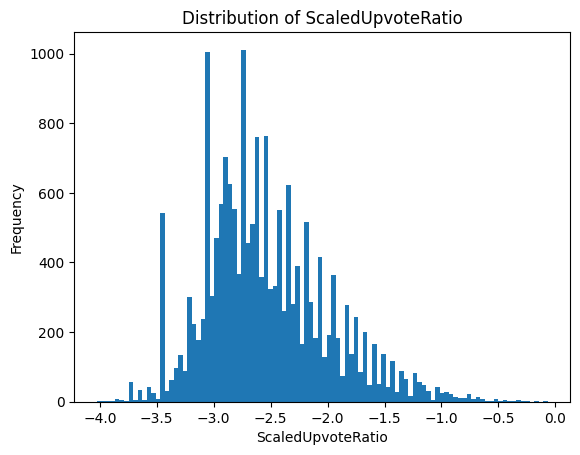

In [10]:
filtered_df = posts_tidy_df.dropna(subset=['NewURL'])
plt.hist((np.log(filtered_df['ScaledUpvoteRatio'])), bins=100)

plt.xlabel('ScaledUpvoteRatio')
plt.ylabel('Frequency')
plt.title('Distribution of ScaledUpvoteRatio')

plt.show()

#### Save images from URLs

In [30]:
#Save images from data frame URL column
root_folder = "C:/Users/sebas/OneDrive/Dokumenter/skole/4 Semester/Fagprojekt/Images/"



def download(row):
   filename = root_folder + row['PostID'] + '.jpg'

   # create folder if it doesn't exist
   os.makedirs(os.path.dirname(filename), exist_ok = True)
   
   try:
        url = row['NewURL']

        if pd.isna(url):
            url = row['ImageURL']
            if pd.isna(url) or not url.startswith('https://i.redd.it/'):
                print(f"Skipping row {row.name} - Missing URL")
                return

            
        
        
        
        if not url.startswith('http://' ) and not url.startswith('https://' ):
            if url.startswith('////'):
                url = 'http://' + url[4:]
            else:
                url = 'http:' + url
        
        

        print(f"Downloading row {row.name} {url} to {filename}")
        r = requests.get(url, allow_redirects=True)

        if len(r.content) < 10240:  # 10kB = 10240 bytes
            print(f"Skipping row {row.name} - Image size is less than 10kB")
            return

        with open(filename, 'wb') as f:
            f.write(r.content)
        
            img = Image.open(filename)
            img = img.resize((224,224))
            img.save(filename)

   except Exception as e:
        print(f"Error occurred while processing row {row.name}: {e}")
        

#test
# posts_tidy_df.apply(download, axis=1)
posts_tidy_df.iloc[0:].apply(download, axis=1)

Skipping row 0 - Missing URL
Skipping row 2 - Missing URL
Skipping row 3 - Missing URL
Skipping row 10 - Missing URL
Skipping row 13 - Missing URL
Skipping row 17 - Missing URL
Skipping row 18 - Missing URL
Skipping row 23 - Missing URL
Skipping row 27 - Missing URL
Skipping row 31 - Missing URL
Skipping row 32 - Missing URL
Skipping row 42 - Missing URL
Skipping row 44 - Missing URL
Skipping row 48 - Missing URL
Skipping row 49 - Missing URL
Skipping row 53 - Missing URL
Skipping row 59 - Missing URL
Skipping row 60 - Missing URL
Skipping row 77 - Missing URL
Skipping row 86 - Missing URL
Skipping row 89 - Missing URL
Skipping row 91 - Missing URL
Skipping row 102 - Missing URL
Skipping row 110 - Image size is less than 10kB
Skipping row 120 - Missing URL
Skipping row 139 - Missing URL
Skipping row 144 - Missing URL
Skipping row 145 - Missing URL
Skipping row 150 - Missing URL
Skipping row 155 - Image size is less than 10kB
Skipping row 160 - Missing URL
Skipping row 162 - Missing URL

0        None
1        None
2        None
3        None
4        None
         ... 
21653    None
21654    None
21655    None
21656    None
21657    None
Length: 21658, dtype: object